# Librerías y Datos

Primeramente se cargan la librerías y el set de datos a utilizar. Es este caso vamos a utilizar el set de datos de Iris, que contienen cuatro variables continuas y una categórica.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', sep=',', header=None, 
                 names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])

Exploración inicial de los datos

In [ ]:
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,class
105,7.6,3.0,6.6,2.1,Iris-virginica
60,5.0,2.0,3.5,1.0,Iris-versicolor
61,5.9,3.0,4.2,1.5,Iris-versicolor
92,5.8,2.6,4.0,1.2,Iris-versicolor
40,5.0,3.5,1.3,0.3,Iris-setosa


Para efectos prácticos, voy a eliminar una categoría.

In [ ]:
df = df[df['class'] != 'Iris-setosa']

# Regresión Lineal

Para realizar el análisis de regresión, vamos a utilizar las variables **sepal_length** y **petal_length**.




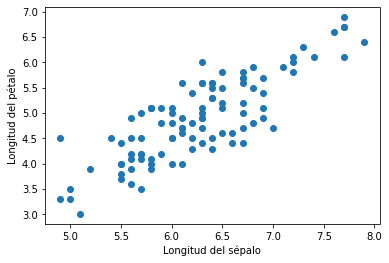

In [ ]:
## Gráfico de dispersión

plt.scatter(df['sepal_length'], df['petal_length'])
plt.xlabel('Longitud del sépalo')
plt.ylabel('Longitud del pétalo')
plt.show()

### Estimación de coeficientes a través del Descenso del Gradiente

In [ ]:
def regresion_lineal_gradiente(X, Y, tasa_aprendizaje, iteraciones, b0_inicial, b1_inicial):

    # Valores iniciales de los parámetros
    b0 = b0_inicial
    b1 = b1_inicial
    
    # Esta informacion es para para efectos de realizar las gráficas
    costo_total = []
    beta1_total = []
    costo_red = []
    beta0_red = []
    beta1_red = []
    
    for i in range(iteraciones):

        # Calcular el valor del gradiente
        y_pred = b0 + b1 * X
        D_b0 = (1 / len(X)) * -2 * np.sum(Y - y_pred)  # Derivada parcial del intercepto: b0
        D_b1 = (1 / len(X)) * -2 * np.sum(X * (Y - y_pred))  # Derivada parcial de B1: b1
        
        # Actualizar b1 y b0
        b0 = b0 - tasa_aprendizaje * D_b0
        b1 = b1 - tasa_aprendizaje * D_b1

        # Esta informacion es para para efectos de realizar las gráficas
        y_pred2 = b0 + b1 * X
        costo = np.sum(((Y - y_pred2) ** 2) / (len(X)))
        costo_total.append(costo)
        beta1_total.append(b1)
        if i % 5000 == 0:
            print("En la iteración {:,} el costo es {:.6f}".format(i, costo))
            costo_red.append(costo)
            beta1_red.append(b1)
            beta0_red.append(b0)

    return b0, b1, costo_total, beta1_total, costo_red, beta1_red, beta0_red

Se calculas las betas:

In [ ]:
args = [df['sepal_length'], df['petal_length'], 0.005, 80001, np.mean(df['petal_length']), 0]
b0, b1, costo_total, beta1_total, costo_red, beta1_red, beta0_red = regresion_lineal_gradiente(*args)
print('\nEl valor de beta 0 es {:.4f}, y el valor de beta 1 es {:.4f}'.format(b0, b1)) 

En la iteración 0 el costo es 0.671534
En la iteración 5,000 el costo es 0.368727
En la iteración 10,000 el costo es 0.265488
En la iteración 15,000 el costo es 0.230091
En la iteración 20,000 el costo es 0.217954
En la iteración 25,000 el costo es 0.213793
En la iteración 30,000 el costo es 0.212366
En la iteración 35,000 el costo es 0.211877
En la iteración 40,000 el costo es 0.211709
En la iteración 45,000 el costo es 0.211652
En la iteración 50,000 el costo es 0.211632
En la iteración 55,000 el costo es 0.211625
En la iteración 60,000 el costo es 0.211623
En la iteración 65,000 el costo es 0.211622
En la iteración 70,000 el costo es 0.211622
En la iteración 75,000 el costo es 0.211622
En la iteración 80,000 el costo es 0.211622

El valor de beta 0 es -1.5545, y el valor de beta 1 es 1.0317


El mínimo costo conseguido es **0.211622**. A continuación revisamos los valores que fue tomando la beta según se iba decrementando el costo total.

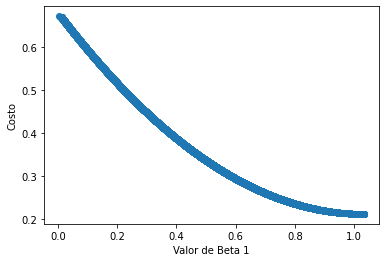

In [ ]:
## Función de beta_1 y costo
plt.scatter(beta1_total, costo_total)
plt.xlabel('Valor de Beta 1')
plt.ylabel('Costo')
plt.show()

En la siguiente gráfica se aprecia como al ir modificándose las betas y minimizando el error, se va moviendo la recta.

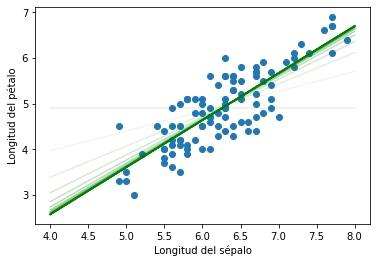

In [ ]:
## Gráfico de dispersión

plt.scatter(df['sepal_length'], df['petal_length'])
plt.xlabel('Longitud del sépalo')
plt.ylabel('Longitud del pétalo')

X = np.linspace(4, 8, 1000)
plt.plot(X, [np.mean(df['petal_length'])]*1000, alpha=0.1, color='green')
for i in range(17):
  Y = (beta1_red[i]*X) + beta0_red[i]
  plt.plot(X, Y, alpha=1/17*i, color='green')
plt.show()

### Cambiando hiperparámetros
Se puede repetir el ejercicio tomando otros valores para la tasa de aprendizaje y para el número de iteraciones. En este caso se toma una tasa de **0.001** y **10,001** iteracciones, y los coeficientes son 1 para ambos casos.

En la iteración 0 el costo es 4.907813
En la iteración 5,000 el costo es 0.266901
En la iteración 10,000 el costo es 0.256248

El valor de beta 0 es 0.4612, y el valor de beta 1 es 0.7133


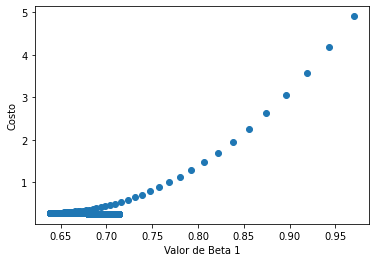

In [ ]:
b0, b1, costo_total, beta1_total, costo_red, beta1_red, beta0_red = regresion_lineal_gradiente(df['sepal_length'], df['petal_length'], 0.001, 10001, 1, 1)
print('\nEl valor de beta 0 es {:.4f}, y el valor de beta 1 es {:.4f}'.format(b0, b1))
plt.scatter(beta1_total, costo_total)
plt.xlabel('Valor de Beta 1')
plt.ylabel('Costo')
plt.show()

### Estimación de las Betas a través de Mínimos Cuadrados Ordinarios
A continuación, y para efectos de comparación con la estimación basada en el descenso del gradiente, se estiman las betas a través de mínimos cuadrados ordinarios utilizando álgebra lineal.

In [ ]:
def regresion_lineal_mco(X, Y):
  data = pd.DataFrame(X)
  data['b'] = 1
  transpuesta = np.transpose(data)
  matriz1 = np.dot(transpuesta, data)
  matriz1_inv = np.linalg.inv(matriz1)
  matriz2 = np.dot(transpuesta, Y)
  matriz_final = np.dot(matriz1_inv, matriz2)
  print('El costo es {:.6f}'.format(np.sum((Y - np.dot(data, matriz_final))**2) / len(Y)))
  return matriz_final[1], matriz_final[0]

b0, b1 = regresion_lineal_mco(df['sepal_length'], df['petal_length'])
print('\nEl valor de beta 0 es {:.4f}, y el valor de beta 1 es {:.4f}'.format(b0, b1))

El costo es 0.211622

El valor de beta 0 es -1.5557, y el valor de beta 1 es 1.0319


# Regresión Logística

El descenso del gradiente también se puede aplicar a una regresión logística. Volvemos a cargar la base y a quedarnos con solo dos clases: versicolor y virginica.

In [ ]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', sep=',', header=None, 
                 names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])

df = df[df['class'] != 'Iris-setosa'].reset_index()
df['bandera'] = np.where(df['class'] == 'Iris-virginica', 1, 0)
df['class'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Name: class, dtype: int64

Para realizar la clasificación vamos a utilizar dos variables, el ancho del sépalo y el largo del sépalo.

[]

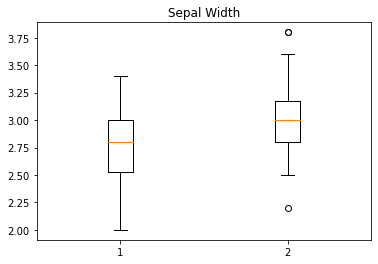

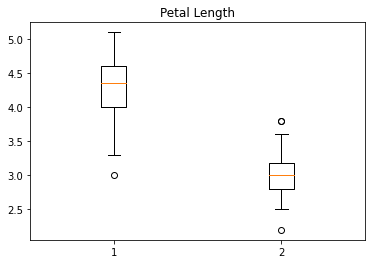

In [ ]:
plt.figure(1)
plt.boxplot([df.loc[df['class'] == 'Iris-versicolor', 'sepal_width'], df.loc[df['class'] == 'Iris-virginica', 'sepal_width']])
plt.title('Sepal Width')
plt.figure(2)
plt.boxplot([df.loc[df['class'] == 'Iris-versicolor', 'petal_length'], df.loc[df['class'] == 'Iris-virginica', 'sepal_width']])
plt.title('Petal Length')
plt.plot()

In [ ]:
df[['sepal_width', 'petal_length']].corr()

,sepal_width,petal_length
sepal_width,1.000000,0.519802
petal_length,0.519802,1.000000


Primero definimos la función de la regresión logística basada en el descenso del gradiente

In [ ]:
# Función de descenso del gradiente

def regresion_logistica_desgrad(X1, X2, Y, tasa_aprendizaje, iteraciones, b0_inicial, b1_inicial, b2_inicial):
    
    # Valores iniciales de los parámetros
    b0 = b0_inicial
    b1 = b1_inicial
    b2 = b2_inicial
    
    # Esta informacion es para para efectos de realizar las gráficas    
    costo_total = []
    beta1_total = []
    beta2_total = []
    costo_red = []
    beta0_red = []
    beta1_red = []
    beta2_red = []

    for i in range(iteraciones):
        y_pred = 1 / (1 + np.exp(-(b0 + b1*X1 + b2*X2)))
        D_b0 = (1 / len(X1)) * -2 * sum((Y - y_pred) * y_pred * (1 - y_pred))  # Derivada parcial del intercepto: b0
        D_b1 = (1 / len(X1)) * -2 * sum(X1 * (Y - y_pred) * y_pred * (1 - y_pred))  # Derivada parcial de B1: b1
        D_b2 = (1 / len(X1)) * -2 * sum(X2 * (Y - y_pred) * y_pred * (1 - y_pred))  # Derivada parcial de B2: b2
        # Actualizar b0, b1 y b2
        b0 = b0 - tasa_aprendizaje * D_b0
        b1 = b1 - tasa_aprendizaje * D_b1
        b2 = b2 - tasa_aprendizaje * D_b2

        # Esta informacion es para para efectos de realizar las gráficas 
        y_pred2 = 1 / (1 + np.exp(-(b0 + b1*X1+ b2*X2)))
        costo = np.sum(((Y - y_pred2) ** 2)) / len(X1)
        costo_total.append(costo)
        beta1_total.append(b1)
        beta2_total.append(b2)
        if i % 5000 == 0:
            print("En la iteración {:,} el costo es {:.6f}".format(i, costo))
            costo_red.append(costo)
            beta0_red.append(b0)
            beta1_red.append(b1)
            beta2_red.append(b2)
    
    return b0, b1, b2, costo_total, beta1_total, beta2_total, costo_red, beta0_red, beta1_red, beta2_red

In [ ]:
%%time
args = [df['sepal_width'], df['petal_length'], df['bandera'], 0.1, 60001, 1, 1, 1]
b0_dg, b1_dg, b2_dg, costo_total, beta1_total, beta2_total, costo_red, beta0_red, beta1_red, beta2_red = regresion_logistica_desgrad(*args)
print('\nEl valor de beta 0 es {:.4f}, el valor de beta 1 es {:.4f}, y el valor de beta 2 es {:.4f}\n'.format(b0_dg, b1_dg, b2_dg))

En la iteración 0 el costo es 0.499578
En la iteración 5,000 el costo es 0.094327
En la iteración 10,000 el costo es 0.079546
En la iteración 15,000 el costo es 0.072417
En la iteración 20,000 el costo es 0.067871
En la iteración 25,000 el costo es 0.064692
En la iteración 30,000 el costo es 0.062350
En la iteración 35,000 el costo es 0.060558
En la iteración 40,000 el costo es 0.059143
En la iteración 45,000 el costo es 0.057997
En la iteración 50,000 el costo es 0.057050
En la iteración 55,000 el costo es 0.056255
En la iteración 60,000 el costo es 0.055578

El valor de beta 0 es -16.3133, el valor de beta 1 es -2.5366, y el valor de beta 2 es 4.8655

CPU times: user 4min 25s, sys: 3.45 s, total: 4min 28s
Wall time: 4min 24s


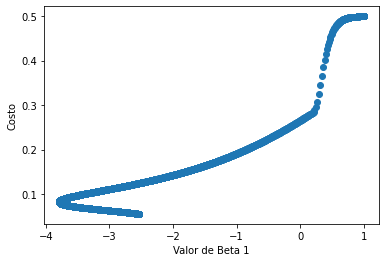

In [ ]:
## Función de beta_1 y costo
plt.scatter(beta1_total, costo_total)
plt.xlabel('Valor de Beta 1')
plt.ylabel('Costo')
plt.show()

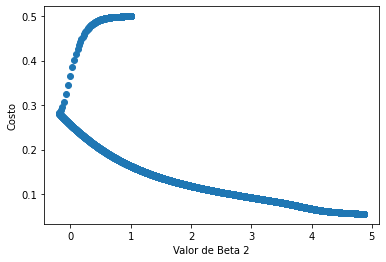

In [ ]:
## Función de beta_2 y costo
plt.scatter(beta2_total, costo_total)
plt.xlabel('Valor de Beta 2')
plt.ylabel('Costo')
plt.show()

### Con SKLEARN

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(df[['sepal_width', 'petal_length']], df['bandera'])

costo = np.sum(((df['bandera'] - logreg.predict_proba(df[['sepal_width', 'petal_length']])[:,1])**2) / len(df['bandera']))
print('El costo es {:.6f}'.format(costo))
print('\nEl valor de beta 0 es {:.4f}, el valor de beta 1 es {:.4f}, y el valor de beta 2 es {:.4f}'.format(logreg.intercept_[0], logreg.coef_[0][0], logreg.coef_[0][1]))

El costo es 0.062555

El valor de beta 0 es -16.6163, el valor de beta 1 es -0.3741, y el valor de beta 2 es 3.6287


In [ ]:
# Cálculo del AUCROC

from sklearn.metrics import roc_auc_score

y_pred_dg = 1 / (1 + np.exp(-(b0_dg + b1_dg*df['sepal_width'] + b2_dg*df['petal_length'])))
y_pred_sk = logreg.predict_proba(df[['sepal_width', 'petal_length']])[:,1]

print('El área bajo la curva roc con descenso del gradiente es {}'.format(roc_auc_score(df['bandera'], y_pred_dg)))
print('El área bajo la curva roc con sklearn es {}'.format(roc_auc_score(df['bandera'], y_pred_sk)))

El área bajo la curva roc con descenso del gradiente es 0.983
El área bajo la curva roc con sklearn es 0.983


### Descenso del Gradiente Estocástico

In [ ]:
def regresion_logisit_dgs(X1, X2, Y, tasa_aprendizaje, iteraciones, b0_inicial, b1_inicial, b2_inicial):

    # Valores iniciales de los parámetros
    b0 = b0_inicial
    b1 = b1_inicial
    b2 = b2_inicial
    
    # Esta informacion es para para efectos de realizar las gráficas
    costo_total = []
    beta1_total = []
    beta2_total = []
    costo_red = []
    beta0_red = []
    beta1_red = []
    beta2_red = []

    # Para efectos de reproducibilidad se fija la semilla
    np.random.seed(0)

    for i in range(iteraciones):

        # Se selecciona un número aleatorio en el rango del largo de la base para seleccionar una observación
        n = np.random.randint(0,len(X1), 1)[0]
        
        y_pred = 1 / (1 + np.exp(-(b0 + b1*X1[n] + b2*X2[n])))
        D_b0 = -2 * (Y[n] - y_pred) * y_pred * (1 - y_pred)  # Derivada parcial del intercepto: b0
        D_b1 = -2 * X1[n] * (Y[n] - y_pred) * y_pred * (1 - y_pred)  # Derivada parcial de B1: b1
        D_b2 = -2 * X2[n] * (Y[n] - y_pred) * y_pred * (1 - y_pred)  # Derivada parcial de B2: b2
        # Actualizar b0, b1 y b2
        b0 = b0 - tasa_aprendizaje * D_b0
        b1 = b1 - tasa_aprendizaje * D_b1
        b2 = b2 - tasa_aprendizaje * D_b2

        # Esta informacion es para para efectos de realizar las gráficas
        y_pred2 = 1 / (1 + np.exp(-(b0 + b1*X1 + b2*X2)))
        costo = np.sum(((Y - y_pred2) ** 2)) / len(X1)
        costo_total.append(costo)
        beta1_total.append(b1)
        beta2_total.append(b2)
        if i % 5000 == 0:
            print("En la iteracion {:,} el costo es {:.6f}".format(i, costo))
            costo_red.append(costo)
            beta0_red.append(b0)
            beta1_red.append(b1)
            beta2_red.append(b2)
            
    return b0, b1, b2, costo_total, beta1_total, beta2_total, costo_red, beta0_red, beta1_red, beta2_red

In [ ]:
%%time

# Mismos parámetros que en des grad normal, solo modifico la tasa de aprendizaje a 0.1
args = [df['sepal_width'], df['petal_length'], df['bandera'], 0.1, 60001, 1, 1, 1]
b0_dgs, b1_dgs, b2_dgs, costo_total, beta1_total, beta2_total, costo_red, beta0_red, beta1_red, beta2_red = regresion_logisit_dgs(*args)
print('\nEl valor de beta 0 es {:.4f}, el valor de beta 1 es {:.4f}, y el valor de beta 2 es {:.4f}\n'.format(b0_dgs, b1_dgs, b2_dgs))

En la iteracion 0 el costo es 0.499578
En la iteracion 5,000 el costo es 0.118521
En la iteracion 10,000 el costo es 0.095445
En la iteracion 15,000 el costo es 0.082610
En la iteracion 20,000 el costo es 0.077203
En la iteracion 25,000 el costo es 0.066866
En la iteracion 30,000 el costo es 0.074323
En la iteracion 35,000 el costo es 0.061499
En la iteracion 40,000 el costo es 0.061024
En la iteracion 45,000 el costo es 0.058040
En la iteracion 50,000 el costo es 0.059304
En la iteracion 55,000 el costo es 0.058611
En la iteracion 60,000 el costo es 0.057491

El valor de beta 0 es -17.3320, el valor de beta 1 es -3.3176, y el valor de beta 2 es 5.4625

CPU times: user 1min 41s, sys: 2.05 s, total: 1min 43s
Wall time: 1min 40s


In [ ]:
# Cálculo del AUCROC
y_proba_sgd = 1 / (1 + np.exp(-(b0_dgs + b1_dgs*df['sepal_width'] + b2_dgs*df['petal_length'])))
print('El área bajo la curva roc con descenso del gradiente estocástico es {}'.format(roc_auc_score(df['bandera'], y_proba_sgd)))

El área bajo la curva roc con descenso del gradiente estocástico es 0.9806
